In [5]:
import sys
sys.path.append('../training_performance')

import platform
from pathlib import Path
from datetime import datetime, timedelta
import datajoint as dj
dj.blob.use_32bit_dims = True # necessary for pd.blob read

from create_trials_df import create_trials_df_from_dj
from create_days_df import create_days_df_from_dj, lazy_load_days_summary_df

from multiplot_summaries import *

import plot_utils as pu
import dj_utils as dju
import dir_utils as du

from plot_trials_info import *
from plot_days_info import *

import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np 

# settings
%load_ext autoreload
%autoreload 2
sns.set_context("talk")

pro_pal = sns.color_palette("husl", 2)[0]
anti_pal = sns.color_palette("husl", 2)[1]
pro_anti_pal = sns.color_palette("husl", 2)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
r023 = create_trials_df_from_dj(
    animal_ids=["R023"], date_min="2023-12-04", date_max="2023_12-23"
)

fetched 19 sessions for R023 between 2023-12-04 and 2023-12-23


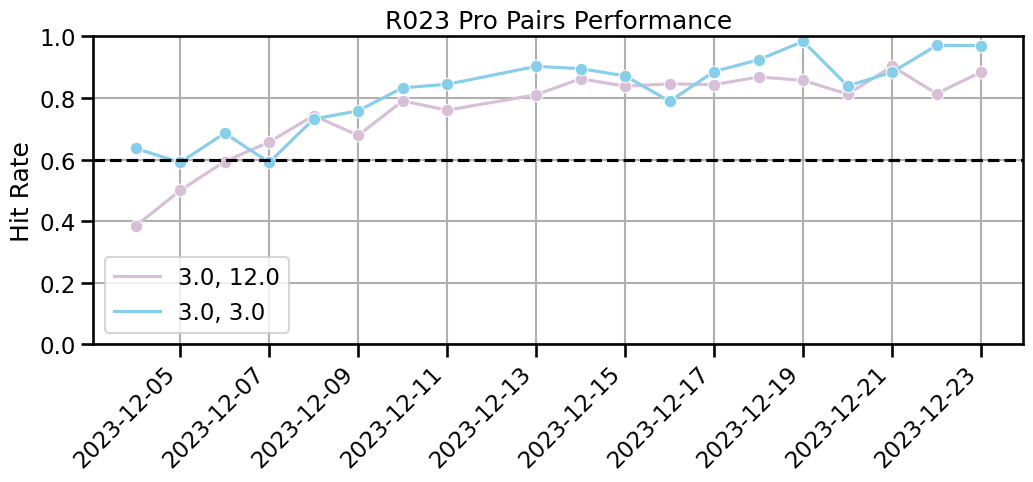

In [7]:
_, ax = pu.make_fig()
plot_non_give_stim_performance(r023, ax=ax, title="R023 Pro Pairs Performance")

# sns.lineplot(data=r023, x="date", y="hits", color=pro_pal, ax=ax, label="Pro Perf")

[Text(0.5, 1.0, 'R023 Pro Summary Performance'), Text(0.5, 0, '')]

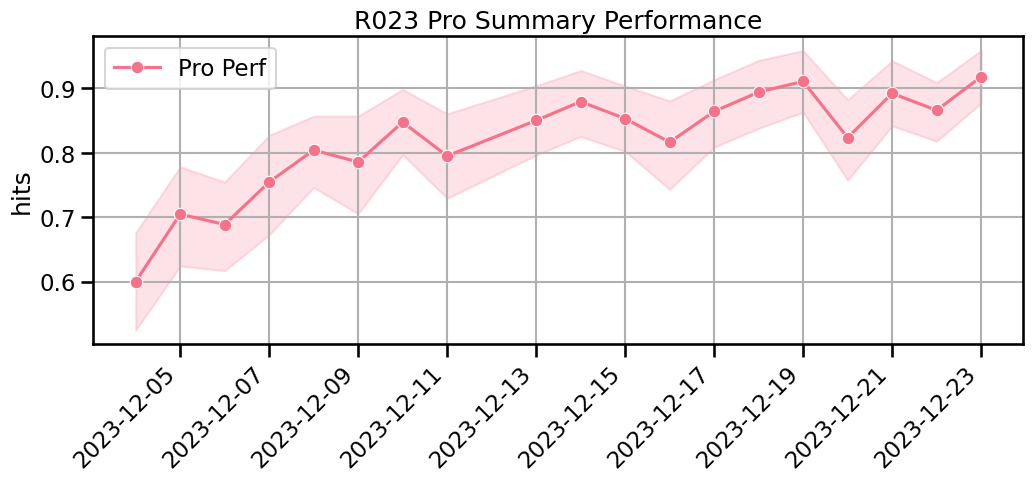

In [8]:
_, ax = pu.make_fig()

sns.lineplot(
    data=r023, x="date", y="hits", color=pro_pal, ax=ax, label="Pro Perf", marker="o"
)
ax.grid()
pu.set_date_x_ticks(ax, True)
ax.set(title="R023 Pro Summary Performance", xlabel="")

In [10]:
r013 = create_trials_df_from_dj(
    animal_ids=["R013"], date_min="2023-11-04", date_max="2023_12-23"
)
thanksgiving_break = datetime(2023, 11, 23).date()

fetched 45 sessions for R013 between 2023-11-04 and 2023-12-22


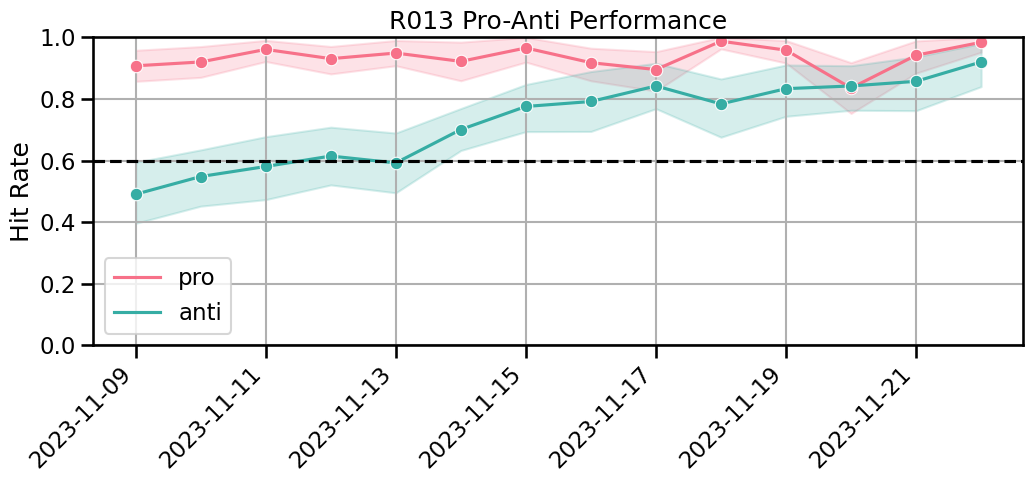

In [11]:
fig, ax = pu.make_fig()
plot_stim_performance_by_pro_anti(
    r013.query("date < @thanksgiving_break"),
    ax=ax,
    title="R013 Pro-Anti Performance",
)

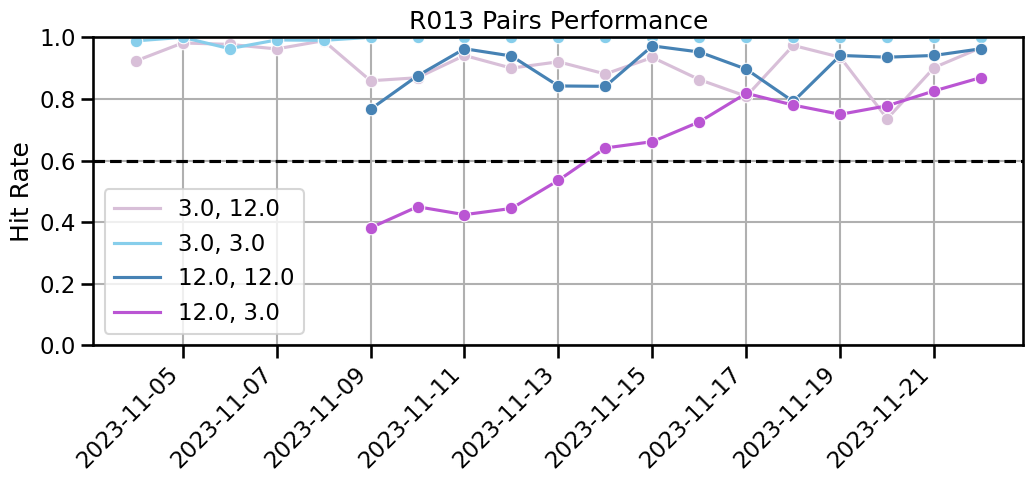

In [12]:
fig, ax = pu.make_fig()
plot_non_give_stim_performance(
    r013.query("date < @thanksgiving_break"),
    ax=ax,
    title="R013 Pairs Performance",
)

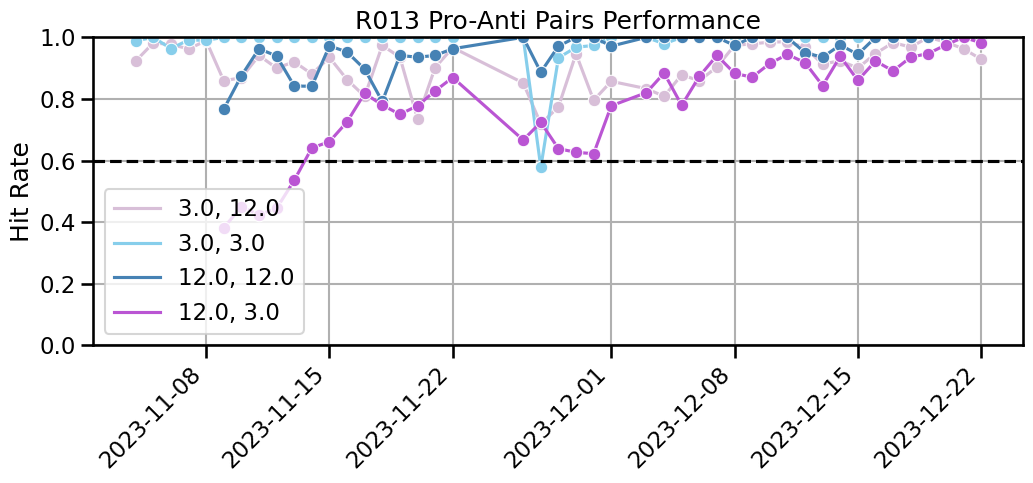

In [13]:
fig, ax = pu.make_fig()
plot_non_give_stim_performance(r013, ax=ax, title="R013 Pro-Anti Pairs Performance")

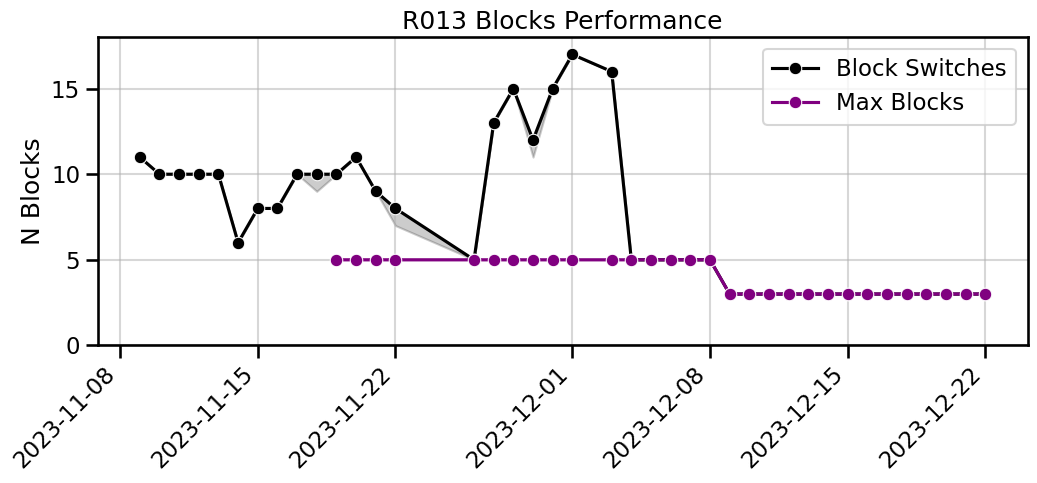

In [14]:
_, ax = pu.make_fig()
plot_n_pro_anti_blocks_days(r013, ax=ax, title="R013 Blocks Performance")

In [18]:
animals = [
    "R010",
    "R011",
    "R012",
    "R013",
    "R014",
    "R015",
    "R028",
    "R029",
    "C215",
    "C220",
    "C221",
    "C222",
]

full_df = create_trials_df_from_dj(
    animal_ids=animals, date_min="2023-10-15", date_max="2023_12-23"
)

fetched 65 sessions for R010 between 2023-10-15 and 2023-12-22
fetched 66 sessions for R011 between 2023-10-15 and 2023-12-22
Not all variables are the same length. Cannot create proper DataFrame
result: 193
hits: 193
violations: 193
temperror: 193
hit_rate: 192
error_rate: 192
violation_rate: 192
temp_error_rate: 192
n_lpokes: 192
n_cpokes: 192
n_rpokes: 192
trial_dur: 192
trial_start: 192
valid_early_spoke: 192
first_spoke: 192
first_lpoke: 192
first_rpoke: 192
n_settling_ins: 192
avg_settling_in: 192
cpoke_dur: 192
stage: 192
curriculum: 192
sides: 193
SMA_set: 192
is_match: 193
sa: 192
sb: 192
stimuli_on: 192
settling_in_dur: 192
legal_cbreak_dur: 192
pre_dur: 192
adj_pre_dur: 192
stimulus_dur: 192
delay_dur: 192
post_dur: 192
sb_extra_dur: 192
viol_off_dur: 192
pre_go_dur: 192
inter_trial_dur: 192
go_type: 192
go_dur: 192
give_type_set: 192
give_type_imp: 192
give_frac: 192
give_delay_dur: 192
give_xtra_light_delay_dur: 192
give_use: 193
replay_on: 192
timeouts: 193
water_delivere

In [16]:
# f_name = "/kn_meeting_full_df.csv"
# path = "/Users/jessbreda/Desktop/github/jbreda_animal_training/data/offline"

# # full_df.to_csv(path + f_name, index=False)

# full_df = pd.read_csv(path + f_name)

/var/folders/__/8jn6qz211155h1xb451s5zcr0000gn/T/ipykernel_21859/1780778160.py:6: DtypeWarning: Columns (54,71) have mixed types. Specify dtype option on import or set low_memory=False.
  full_df = pd.read_csv(path + f_name)


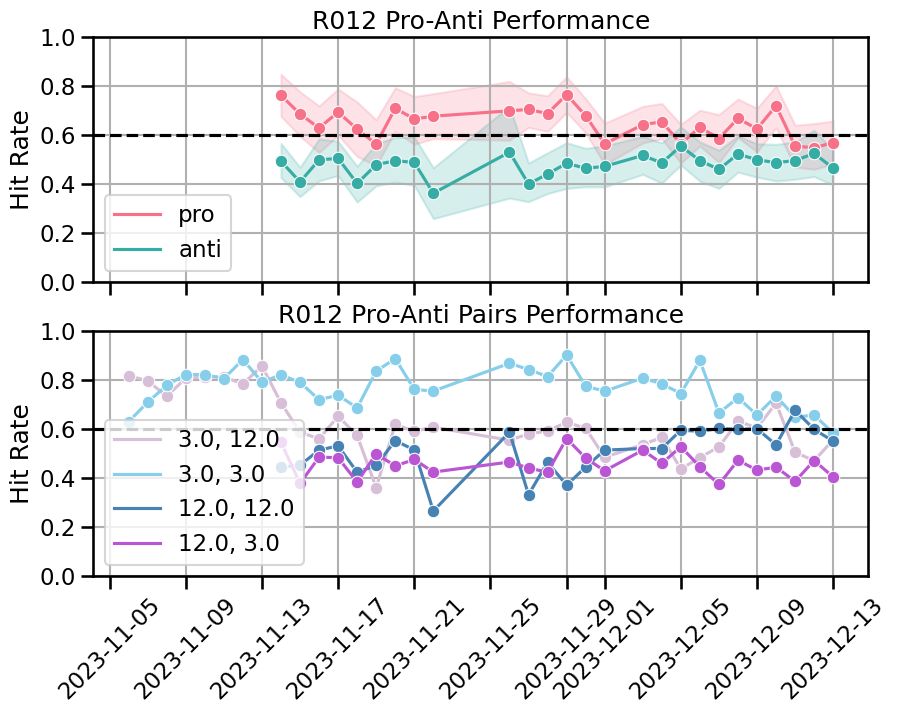

In [20]:
animal = "R012"

date = datetime(2023, 12, 14).date()
r012 = full_df.query("animal_id == @animal and stage > 10 and date < @date").copy()
fig, ax = plt.subplots(2, 1, figsize=(10, 7), sharex=True)
plot_stim_performance_by_pro_anti(
    r012, ax=ax[0], title=f"{animal} Pro-Anti Performance", aesthetics=False
)
plot_non_give_stim_performance(
    r012, ax=ax[1], title=f"{animal} Pro-Anti Pairs Performance", aesthetics=False
)  # have to comment out
# rotate xticks
ax[1].tick_params(axis="x", rotation=45)

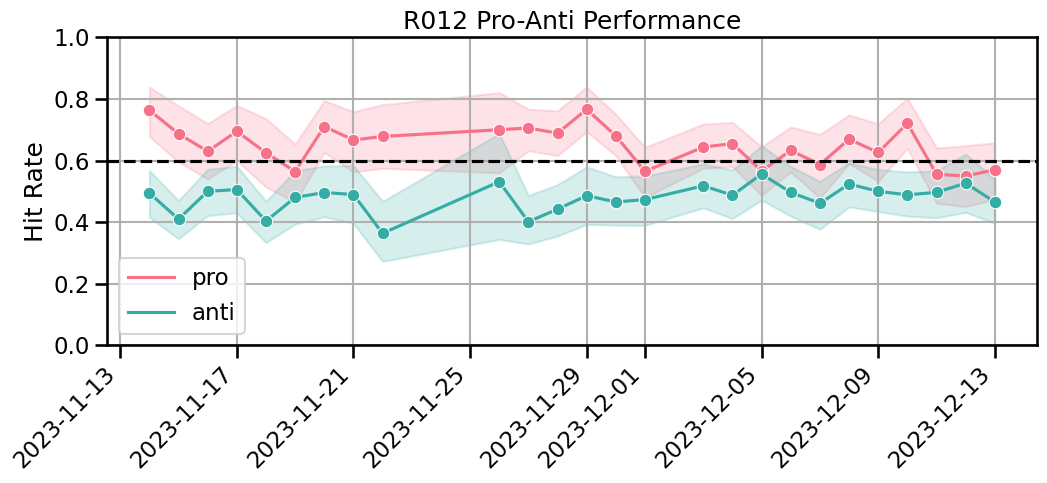

In [21]:
animal = "R012"
df = full_df.query("animal_id == @animal and stage > 10 and date < @date").copy()
fig, ax = pu.make_fig()
plot_stim_performance_by_pro_anti(
    df, ax=ax, title=f"{animal} Pro-Anti Performance", aesthetics=True
)

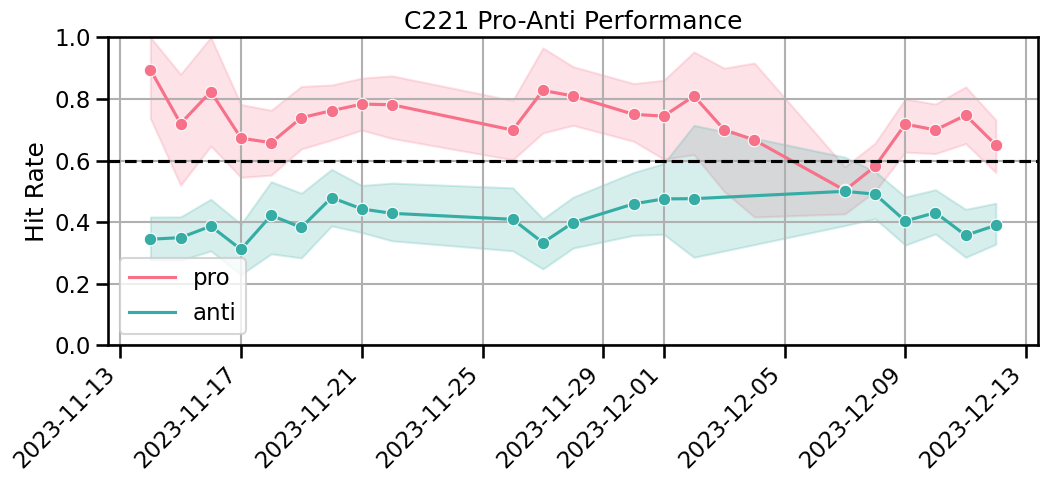

In [103]:
animal = "C221"
date = datetime(2023, 12, 13).date()
df = full_df.query("animal_id == @animal and stage > 10 and date < @date").copy()
fig, ax = pu.make_fig()
plot_stim_performance_by_pro_anti(
    df,
    ax=ax,
    title=f"{animal} Pro-Anti Performance",
)

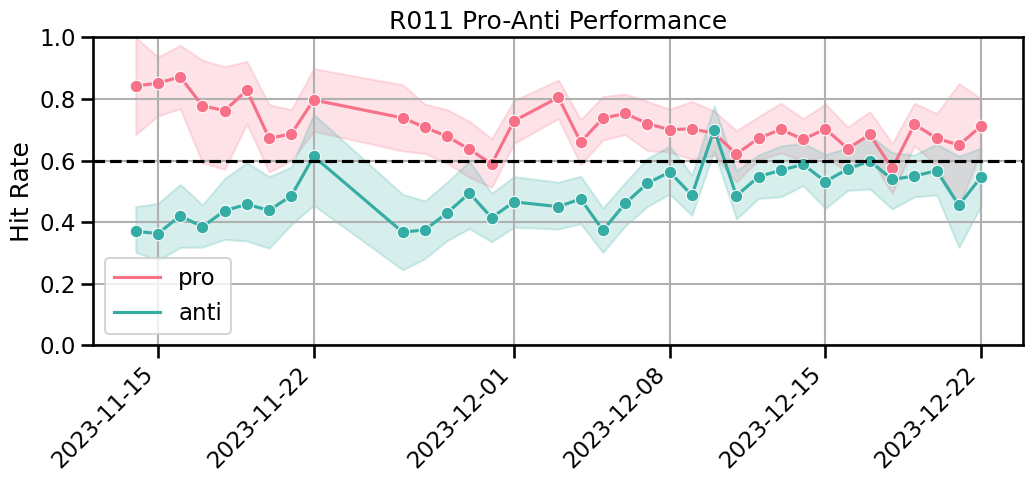

In [110]:
animal = "R011"
date = datetime(2023, 12, 23).date()
df = full_df.query("animal_id == @animal and stage > 10 and date < @date").copy()
fig, ax = pu.make_fig()
plot_stim_performance_by_pro_anti(
    df,
    ax=ax,
    title=f"{animal} Pro-Anti Performance",
)

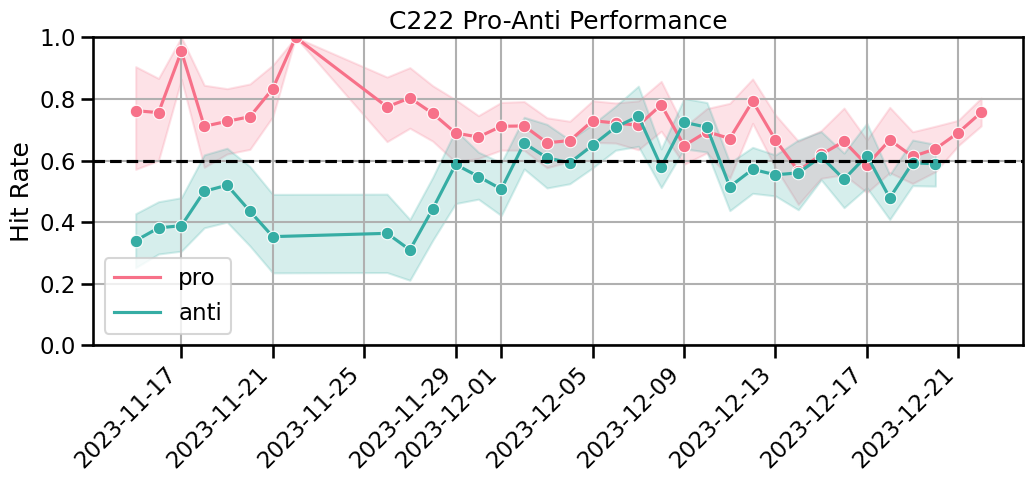

In [112]:
animal = "C222"
date = datetime(2023, 12, 23).date()
df = full_df.query("animal_id == @animal and stage > 10 and date < @date").copy()
fig, ax = pu.make_fig()
plot_stim_performance_by_pro_anti(
    df,
    ax=ax,
    title=f"{animal} Pro-Anti Performance",
)

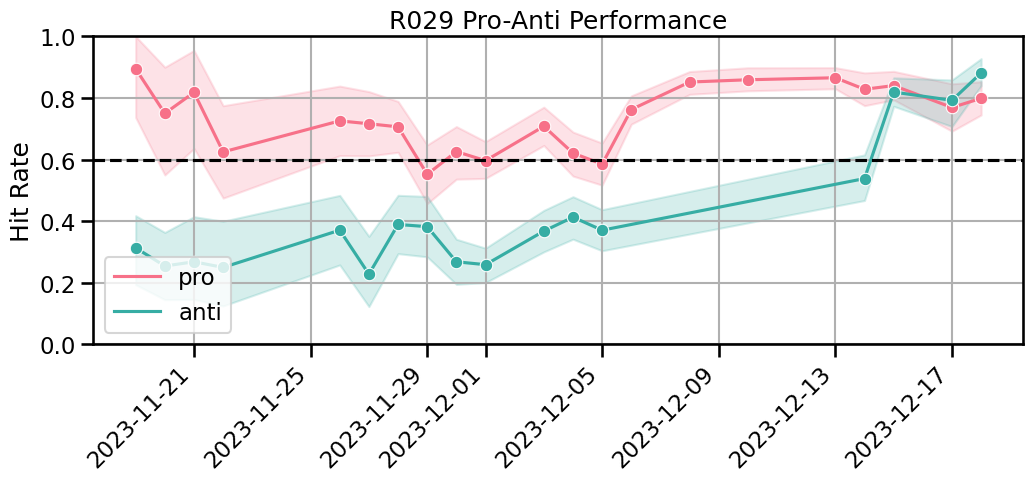

In [129]:
animal = "R029"
min_date = datetime(2023, 11, 18).date()
max_date = datetime(2023, 12, 19).date()
df = full_df.query(
    "animal_id == @animal and stage > 10 and date > @min_date and date < @max_date"
).copy()

fig, ax = pu.make_fig()
plot_stim_performance_by_pro_anti(
    df,
    ax=ax,
    title=f"{animal} Pro-Anti Performance",
)

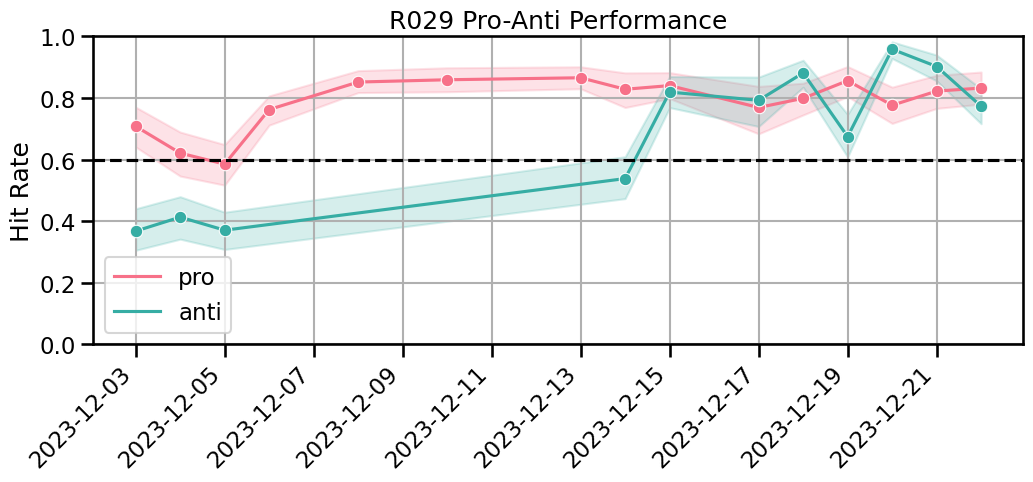

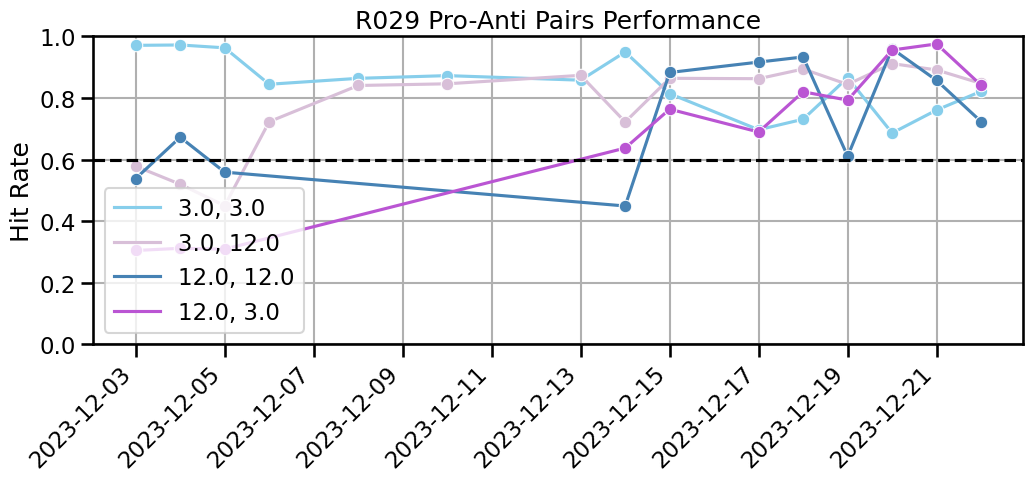

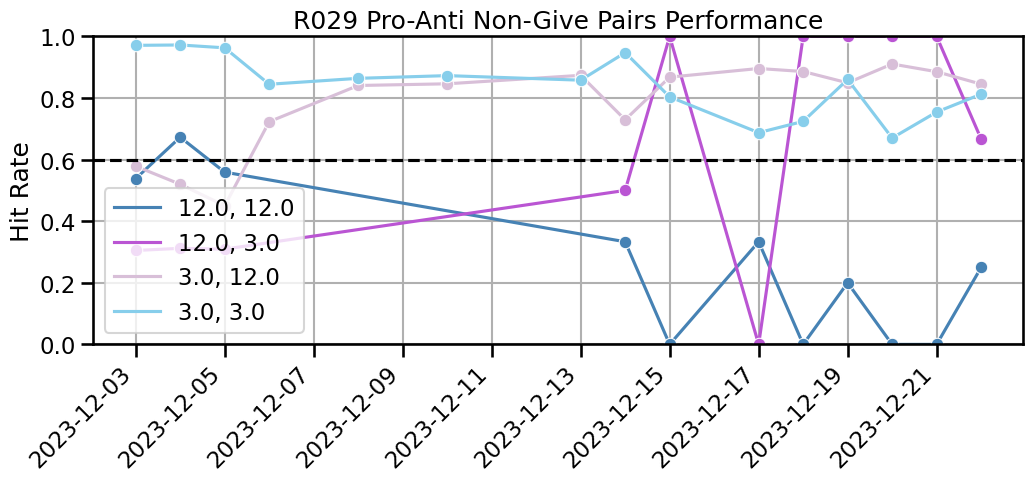

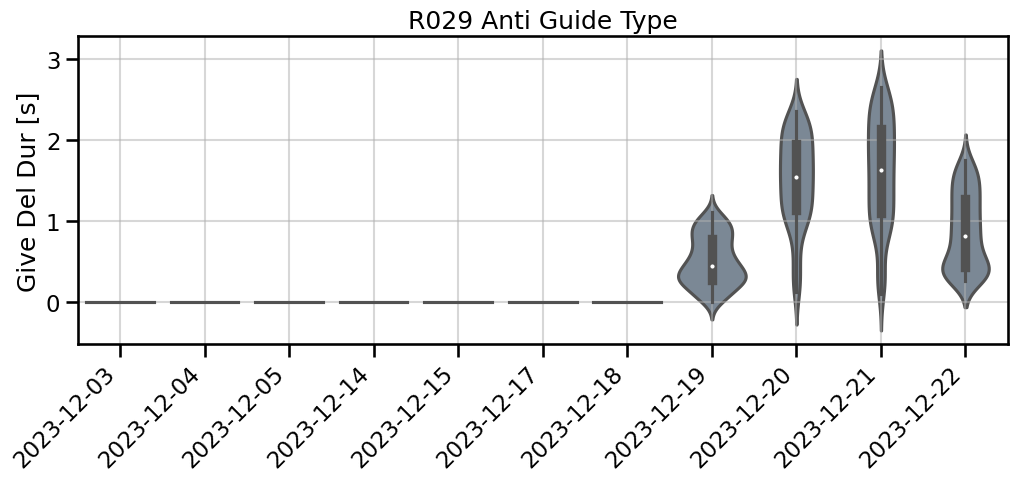

In [22]:
animal = "R029"
min_date = datetime(2023, 12, 1).date()
max_date = datetime(2023, 12, 23).date()
df = full_df.query(
    "animal_id == @animal and stage > 10 and date > @min_date and date < @max_date"
).copy()

fig, ax = pu.make_fig()
plot_stim_performance_by_pro_anti(
    df,
    ax=ax,
    title=f"{animal} Pro-Anti Performance",
)
fig, ax2 = pu.make_fig()
plot_stim_performance(df, ax=ax2, title=f"{animal} Pro-Anti Pairs Performance")

fig, ax4 = pu.make_fig()
plot_non_give_stim_performance(
    df, ax=ax4, title=f"{animal} Pro-Anti Non-Give Pairs Performance", variance=False
)
fig, ax3 = pu.make_fig()
plot_give_delay_dur_days(
    df, ax=ax3, title=f"{animal} Anti Guide Type", xaxis_label=True
)

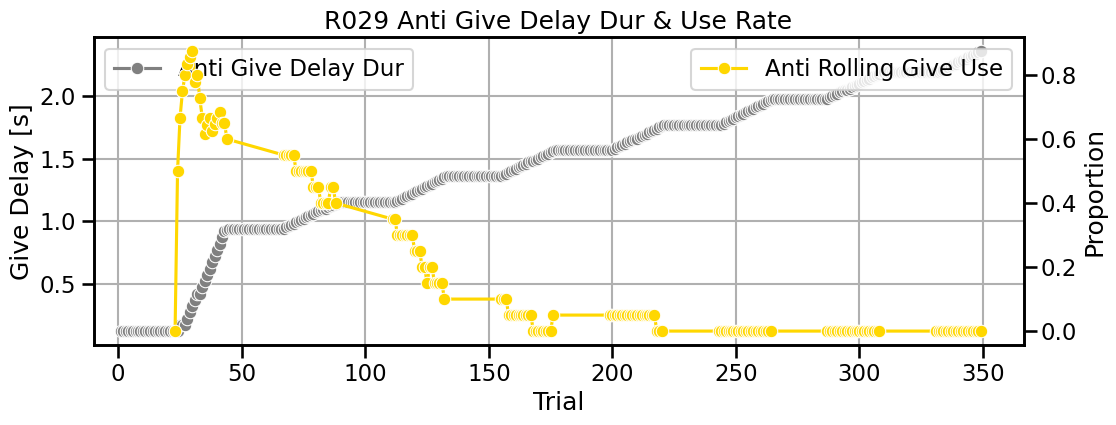

In [166]:
single_session = datetime(2023, 12, 20).date()

tdf = df.query("date == @single_session").copy()

fig, ax = pu.make_fig()

## GIVE DELAY DUR
sns.lineplot(
    data=tdf,
    x="trial",
    y="give_delay_dur",
    marker="o",
    label="Anti Give Delay Dur",
    color="gray",
    ax=ax,
)

ax.grid()

## GIVE USE RATE ROLLING
anti_trials_df = calc_anti_give_use_rate(tdf)

anti_trials_df = (
    anti_trials_df.groupby("pro_anti_block_type")
    .apply(rolling_avg, window_size=20)
    .reset_index(drop=True)
)

anti_trials_df = (
    anti_trials_df.groupby("pro_anti_block_type")
    .apply(rolling_avg, window_size=window_size, column="give_use")
    .reset_index(drop=True)
)

ax2 = ax.twinx()
sns.lineplot(
    data=anti_trials_df,
    x="trial",
    y=f"give_use_rolling_avg_{20}",
    marker="o",
    color="gold",
    label="Anti Rolling Give Use",
    ax=ax2,
)

_ = ax.set(
    ylabel="Give Delay [s]",
    xlabel="Trial",
    title=f"{animal} Anti Give Delay Dur & Use Rate",
    xlim=(-10, None),
)

_ = ax2.set(ylabel="Proportion")

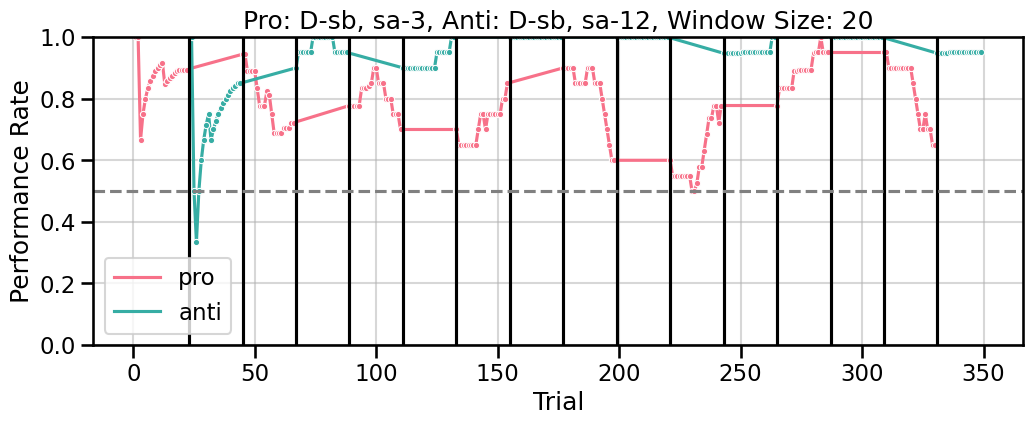

In [169]:
plot_rolling_hit_rate_by_pro_anti(tdf)

<Axes: xlabel='trial', ylabel='give_use_rolling_avg_20'>

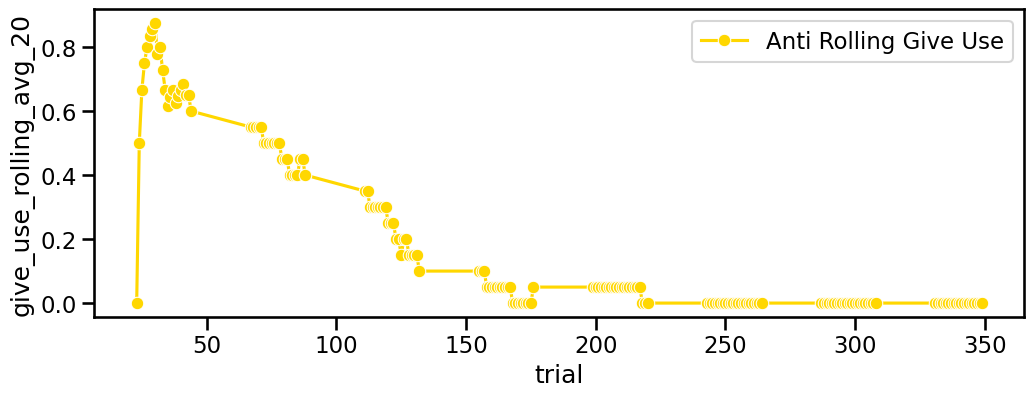

In [159]:
anti_trials_df = calc_anti_give_use_rate(tdf)

anti_trials_df = (
    anti_trials_df.groupby("pro_anti_block_type")
    .apply(rolling_avg, window_size=20)
    .reset_index(drop=True)
)

anti_trials_df = (
    anti_trials_df.groupby("pro_anti_block_type")
    .apply(rolling_avg, window_size=window_size, column="give_use")
    .reset_index(drop=True)
)

fig, ax2 = pu.make_fig()
sns.lineplot(
    data=anti_trials_df,
    x="trial",
    y=f"give_use_rolling_avg_{20}",
    marker="o",
    color="gold",
    label="Anti Rolling Give Use",
    ax=ax2,
)